In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
housing = pd.read_csv("train.csv")

In [4]:
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [2737]:
print(housing.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Data Cleaning and Manipulation

In [2738]:
housing_original = housing.copy() #saving a copy of the original dataframe before transforming

In [2739]:
def percentage_of_missing_values(housing) : 
    missing_percentage = round(housing.isna().sum()/len(housing.index) * 100,2)
    missing_percentage.sort_values(ascending=False,inplace=True)
    return missing_percentage[missing_percentage>0]

In [2740]:
percentage_of_missing_values(housing)

PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
FireplaceQu     47.26
LotFrontage     17.74
GarageYrBlt      5.55
GarageCond       5.55
GarageType       5.55
GarageFinish     5.55
GarageQual       5.55
BsmtFinType2     2.60
BsmtExposure     2.60
BsmtQual         2.53
BsmtCond         2.53
BsmtFinType1     2.53
MasVnrArea       0.55
MasVnrType       0.55
Electrical       0.07
dtype: float64

#### below columns have more than 80% of missing values
- PoolQC           99.52
- MiscFeature      96.30
- Alley            93.77
- Fence            80.75


In [2741]:
housing['PoolQC'].value_counts(dropna=False)

NaN    1453
Gd        3
Fa        2
Ex        2
Name: PoolQC, dtype: int64

In [2742]:
#according to the data definition for PoolQC , NA value means "no pool". So imputing "NA" in all the missing values
housing['PoolQC'].fillna('NA',inplace=True)

In [2743]:
housing['PoolQC'].value_counts(dropna=False)

NA    1453
Gd       3
Fa       2
Ex       2
Name: PoolQC, dtype: int64

In [2744]:
housing['MiscFeature'].value_counts(dropna=False)

NaN     1406
Shed      49
Othr       2
Gar2       2
TenC       1
Name: MiscFeature, dtype: int64

In [2745]:
#according to the data definition for MiscFeature, NA value means "none" features . So imputing "NA" in all the missing values
housing['MiscFeature'].fillna('NA',inplace=True)

In [2746]:
housing['MiscFeature'].value_counts(dropna=False)

NA      1406
Shed      49
Othr       2
Gar2       2
TenC       1
Name: MiscFeature, dtype: int64

In [2747]:
housing['Alley'].value_counts(dropna=False)

NaN     1369
Grvl      50
Pave      41
Name: Alley, dtype: int64

In [2748]:
#according to the data definition for Alley, NA value means "no alley access" . So imputing "NA" in all the missing values
housing['Alley'].fillna('NA',inplace=True)

In [2749]:
housing['Alley'].value_counts(dropna=False)

NA      1369
Grvl      50
Pave      41
Name: Alley, dtype: int64

In [2750]:
housing['Fence'].value_counts(dropna=False)

NaN      1179
MnPrv     157
GdPrv      59
GdWo       54
MnWw       11
Name: Fence, dtype: int64

In [2751]:
#according to the data definition for Fence, NA value means "no Fence" . So imputing "NA" in all the missing values
housing['Fence'].fillna('NA',inplace=True)

In [2752]:
housing['Fence'].value_counts(dropna=False)

NA       1179
MnPrv     157
GdPrv      59
GdWo       54
MnWw       11
Name: Fence, dtype: int64

In [2753]:
# FireplaceQu also have more than 47% values missing
housing['FireplaceQu'].value_counts(dropna=False)

NaN    690
Gd     380
TA     313
Fa      33
Ex      24
Po      20
Name: FireplaceQu, dtype: int64

In [2754]:
#according to the data definition for FireplaceQu, NA value means "no fireplace" . So imputing "NA" in all the missing values
housing['FireplaceQu'].fillna('NA',inplace=True)

In [2755]:
housing['FireplaceQu'].value_counts(dropna=False)

NA    690
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [2756]:
# LotFrontage have more than 17% values missing
housing['LotFrontage'].isna().sum()

259

In [2757]:
housing['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

<AxesSubplot:xlabel='LotFrontage'>

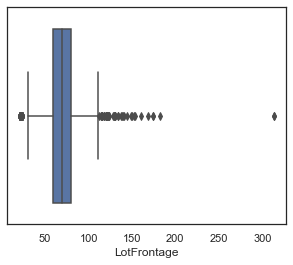

In [2758]:
plt.figure(figsize=(5,4))
sns.boxplot(housing["LotFrontage"])

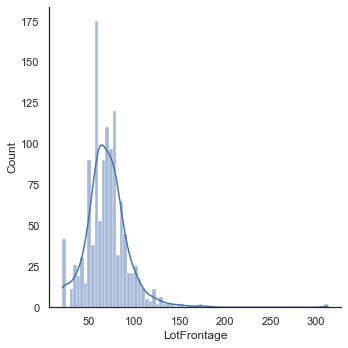

In [2759]:
sns.displot(housing.LotFrontage,kde=True)

#### we can see that  the data is right skewed , so imputing the missing values with the median value 

In [2760]:
housing.LotFrontage=housing.LotFrontage.fillna(value=housing['LotFrontage'].median()) 

In [2761]:
housing['LotFrontage'].isna().sum()

0

In [2762]:
housing['LotFrontage'].describe()

count    1460.000000
mean       69.863699
std        22.027677
min        21.000000
25%        60.000000
50%        69.000000
75%        79.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [2763]:
percentage_of_missing_values(housing)

GarageYrBlt     5.55
GarageCond      5.55
GarageFinish    5.55
GarageQual      5.55
GarageType      5.55
BsmtExposure    2.60
BsmtFinType2    2.60
BsmtCond        2.53
BsmtFinType1    2.53
BsmtQual        2.53
MasVnrArea      0.55
MasVnrType      0.55
Electrical      0.07
dtype: float64

#### we still see a number of missing records, analysing them one by one

In [2764]:
# GarageYrBlt
housing['GarageYrBlt'].isna().sum()

81

In [2765]:
#looking at the data where GarageYrBlt is missing. 
housing[housing['GarageYrBlt'].isna()].head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
39,40,90,RL,65.0,6040,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,Duplex,1Story,4,5,1955,1955,Gable,CompShg,AsbShng,Plywood,None,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,N,FuseP,1152,0,0,1152,0,0,2,0,2,2,Fa,6,Typ,0,NA,NaN,NaN,NaN,0,0,NaN,NaN,N,0,0,0,0,0,0,NA,NA,NA,0,6,2008,WD,AdjLand,82000
48,49,190,RM,33.0,4456,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,4,5,1920,2008,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,736,736,GasA,Gd,Y,SBrkr,736,716,0,1452,0,0,2,0,2,3,TA,8,Typ,0,NA,NaN,NaN,NaN,0,0,NaN,NaN,N,0,0,102,0,0,0,NA,NA,NA,0,6,2009,New,Partial,113000
78,79,90,RL,72.0,10778,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,4,5,1968,1968,Hip,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,0,1768,1768,GasA,TA,N,SBrkr,1768,0,0,1768,0,0,2,0,4,2,TA,8,Typ,0,NA,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,0,0,0,0,0,NA,NA,NA,0,4,2010,WD,Normal,136500
88,89,50,C (all),105.0,8470,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,IDOTRR,Feedr,Feedr,1Fam,1.5Fin,3,2,1915,1982,Hip,CompShg,Plywood,Plywood,None,0.0,Fa,Fa,CBlock,TA,Fa,No,Unf,0,Unf,0,1013,1013,GasA,TA,N,SBrkr,1013,0,513,1526,0,0,1,0,2,1,Fa,6,Typ,0,NA,NaN,NaN,NaN,0,0,NaN,NaN,N,0,0,156,0,0,0,NA,MnPrv,NA,0,10,2009,ConLD,Abnorml,85000
89,90,20,RL,60.0,8070,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,4,5,1994,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,588,Unf,0,402,990,GasA,Ex,Y,SBrkr,990,0,0,990,1,0,1,0,3,1,TA,5,Typ,0,NA,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,0,0,0,0,0,NA,NA,NA,0,8,2007,WD,Normal,123600


In [2766]:
#we can conclude that missing values in cloumns like GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,
# GarageCond , simply means there is no garage or not much information about the garage condition.
# so we can impute missing values in GarageYrBlt with the YearBuilt
housing.GarageYrBlt=housing.GarageYrBlt.fillna(value=housing['YearBuilt']).astype(int)

In [2767]:
housing[housing.Id==40]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
39,40,90,RL,65.0,6040,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,Duplex,1Story,4,5,1955,1955,Gable,CompShg,AsbShng,Plywood,None,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,N,FuseP,1152,0,0,1152,0,0,2,0,2,2,Fa,6,Typ,0,NA,NaN,1955,NaN,0,0,NaN,NaN,N,0,0,0,0,0,0,NA,NA,NA,0,6,2008,WD,AdjLand,82000


In [2768]:
#missing values in GarageCond,GarageFinish,GarageQual,GarageType means "no garage", so imputing "NA" in 
#all the missing values for the columns
housing['GarageCond'].fillna('NA',inplace=True)
housing['GarageFinish'].fillna('NA',inplace=True)
housing['GarageQual'].fillna('NA',inplace=True)
housing['GarageType'].fillna('NA',inplace=True)

In [2769]:
percentage_of_missing_values(housing)

BsmtExposure    2.60
BsmtFinType2    2.60
BsmtFinType1    2.53
BsmtQual        2.53
BsmtCond        2.53
MasVnrType      0.55
MasVnrArea      0.55
Electrical      0.07
dtype: float64

In [2770]:
#according to the data definition for BsmtExposure,BsmtFinType2,BsmtFinType1,BsmtQual and BsmtCond
# NA value means "No Basement" . So imputing "NA" in all the missing values
housing['BsmtExposure'].fillna('NA',inplace=True)
housing['BsmtFinType1'].fillna('NA',inplace=True)
housing['BsmtFinType2'].fillna('NA',inplace=True)
housing['BsmtQual'].fillna('NA',inplace=True)
housing['BsmtCond'].fillna('NA',inplace=True)

In [2771]:
percentage_of_missing_values(housing)

MasVnrType    0.55
MasVnrArea    0.55
Electrical    0.07
dtype: float64

In [2772]:
# MasVnrType
housing['MasVnrType'].isna().sum()

8

In [2773]:
housing['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [2774]:
#there are 8 missing values in MasVnrType, so imputing it with the mode
housing.MasVnrType.fillna(value=housing['MasVnrType'].mode()[0],inplace=True)

In [2775]:
#MasVnrArea
housing['MasVnrArea'].isna().sum()

8

In [2776]:
#there are 8 missing values in MasVnrArea, so imputing it with the mode
housing.MasVnrArea.fillna(value=housing['MasVnrArea'].mode()[0],inplace=True)

In [2777]:
#Electrical
housing['Electrical'].isna().sum()

1

In [2778]:
#there is only 1 missing values in Electrical, so imputing it with the mode
housing.Electrical.fillna(value=housing['Electrical'].mode()[0],inplace=True)

In [2779]:
percentage_of_missing_values(housing)

Series([], dtype: float64)

In [2780]:
#dropping Id as its not required
housing.drop(columns='Id',axis=1,inplace=True)

### All the missing values have been handled

In [2781]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

### Feature Engineering

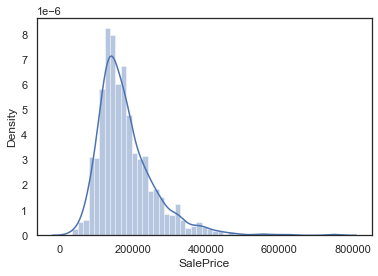

skewness= 1.8828757597682129


In [2782]:
# first we will check the distribution of the target variable SalePrice
sns.distplot(housing['SalePrice'])
plt.show()
print("skewness=",housing.SalePrice.skew())

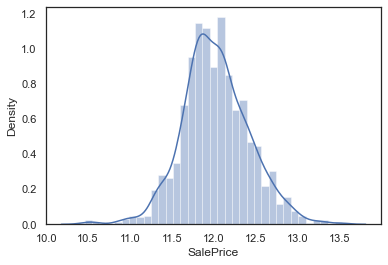

skewness= 0.12133506220520406


In [2783]:
#we see that the distribution is skewed to the right side
#we will perform log transformation and check if distribution corrects itself
housing.SalePrice = np.log(housing.SalePrice)
sns.distplot(housing['SalePrice'])
plt.show()
print("skewness=",housing.SalePrice.skew())

#### now the SalePrice is normally distributed

In [2784]:
# According to the data description , most of the columns of type Object have finite values  
# and are kind of a category, so changing there type from Object to Category, since it will be more efficient
housing.loc[:, housing.dtypes == 'object'] = housing.select_dtypes(['object']).apply(lambda x: x.astype('category'))

In [2785]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   MSSubClass     1460 non-null   int64   
 1   MSZoning       1460 non-null   category
 2   LotFrontage    1460 non-null   float64 
 3   LotArea        1460 non-null   int64   
 4   Street         1460 non-null   category
 5   Alley          1460 non-null   category
 6   LotShape       1460 non-null   category
 7   LandContour    1460 non-null   category
 8   Utilities      1460 non-null   category
 9   LotConfig      1460 non-null   category
 10  LandSlope      1460 non-null   category
 11  Neighborhood   1460 non-null   category
 12  Condition1     1460 non-null   category
 13  Condition2     1460 non-null   category
 14  BldgType       1460 non-null   category
 15  HouseStyle     1460 non-null   category
 16  OverallQual    1460 non-null   int64   
 17  OverallCond    1460 non-null   in

In [2786]:
#MSSubClass is also having a limited no of values , so converting it into Category
housing['MSSubClass'] = housing['MSSubClass'].astype("category")

In [2787]:
housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NA,Attchd,2003,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NA,NA,NA,0,2,2008,WD,Normal,12.247694
1,20,RL,80.0,9600,Pave,NA,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NA,NA,NA,0,5,2007,WD,Normal,12.109011
2,60,RL,68.0,11250,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NA,NA,NA,0,9,2008,WD,Normal,12.317167
3,70,RL,60.0,9550,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NA,NA,NA,0,2,2006,WD,Abnorml,11.849398
4,60,RL,84.0,14260,Pave,NA,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NA,NA,NA,0,12,2008,WD,Normal,12.429216


In [2788]:
# these columns are categorical , so converting into category 
category_col = ['BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','KitchenAbvGr']
housing[category_col] = housing[category_col].astype("category")

<AxesSubplot:xlabel='BedroomAbvGr', ylabel='count'>

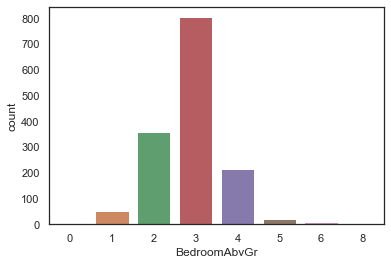

In [2789]:
#univariate analysis of BedroomAbvGr
plt.figure(figsize=(6,4))
sns.countplot(housing["BedroomAbvGr"])

<AxesSubplot:xlabel='BedroomAbvGr', ylabel='SalePrice'>

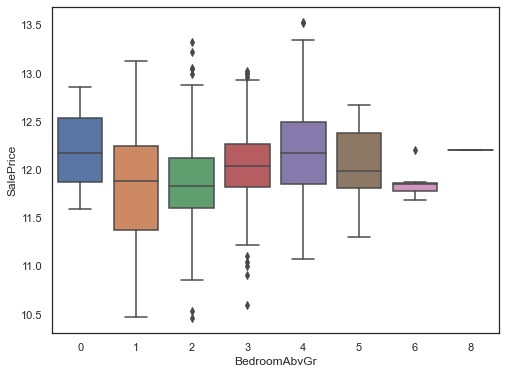

In [2790]:
#bivariate analysis of BedroomAbvGr
plt.figure(figsize=(8,6))
sns.boxplot(x="BedroomAbvGr",y="SalePrice",data=housing)

In [2791]:
housing['BedroomAbvGr'].corr(housing.SalePrice)

0.2090436821269203

In [2792]:
#as we can see there is no direct correlation between salesprice and BedroomAbvGr, so we will check to  transform it in any 
#other way

In [2793]:
housing['BedroomAbvGr'].value_counts()

3    804
2    358
4    213
1     50
5     21
6      7
0      6
8      1
Name: BedroomAbvGr, dtype: int64

In [2794]:
#percentage of values in BedroomAbvGr for  0,1,5,6,8
(50+21+7+6+1)/len(housing.index)*100

5.821917808219178

In [2795]:
#Since its less than 6% of the values, so instead of creating dummy variable for all the different values, 
#we will impute the values which are considerably very less by binning them
#for 0 and 1 , we will bin them to 1_and_less
#for 5,6,8 , we will bin them with 4 as 4_and_more
bin_values=4,5,6,8
housing.loc[housing.BedroomAbvGr.isin(bin_values), "BedroomAbvGr"] = "4_and_more"
bin_values=0,1
housing.loc[housing.BedroomAbvGr.isin(bin_values), "BedroomAbvGr"] = "1_and_less"


In [2796]:
#now we can convert BedroomAbvGr to category as well
housing['BedroomAbvGr'] = housing['BedroomAbvGr'].astype("category")

In [2797]:
housing['BedroomAbvGr'].value_counts()

3             804
2             358
4_and_more    242
1_and_less     56
Name: BedroomAbvGr, dtype: int64

<AxesSubplot:xlabel='TotRmsAbvGrd', ylabel='count'>

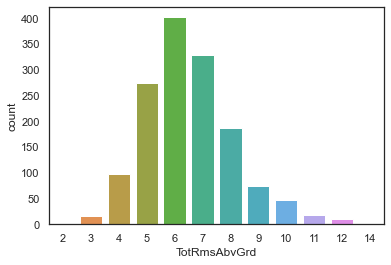

In [2798]:
#TotRmsAbvGrd
#Uivariate analysis of BedroomAbvGr
plt.figure(figsize=(6,4))
sns.countplot(housing["TotRmsAbvGrd"])

<AxesSubplot:xlabel='TotRmsAbvGrd', ylabel='SalePrice'>

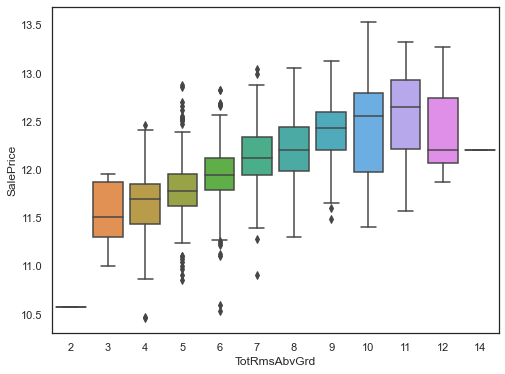

In [2799]:
#Bivariate analysis of BedroomAbvGr
plt.figure(figsize=(8,6))
sns.boxplot(x="TotRmsAbvGrd",y="SalePrice",data=housing)

In [2800]:
housing['TotRmsAbvGrd'].corr(housing.SalePrice)

0.5344222037231254

In [2801]:
#we see there is a good correlation between TotRmsAbvGrd' and SalesPrice , so we will keep the attribute as numeric
#However values like 2 and 14 just have 1 counts ,so we will bin them to the nearest
#for value 2 -we will bin it with 3
#for value 14- we will bin it with 12
bin_values=[2]
housing.loc[housing.TotRmsAbvGrd.isin(bin_values), "TotRmsAbvGrd"] = 3
bin_values=[14]
housing.loc[housing.TotRmsAbvGrd.isin(bin_values), "TotRmsAbvGrd"] = 12

In [2802]:
housing.TotRmsAbvGrd.value_counts()

6     402
7     329
5     275
8     187
4      97
9      75
10     47
3      18
11     18
12     12
Name: TotRmsAbvGrd, dtype: int64

In [2803]:
#Fireplaces
housing['Fireplaces'].value_counts()

0    690
1    650
2    115
3      5
Name: Fireplaces, dtype: int64

<AxesSubplot:xlabel='Fireplaces', ylabel='SalePrice'>

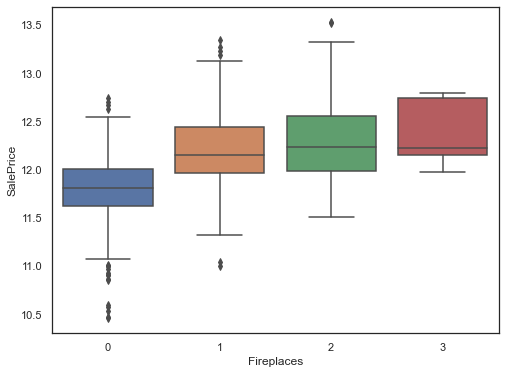

In [2804]:
#Bivariate analysis of BedroomAbvGr
plt.figure(figsize=(8,6))
sns.boxplot(x="Fireplaces",y="SalePrice",data=housing)

In [2805]:
housing.Fireplaces.corr(housing.SalePrice)

0.48944942759848514

In [2806]:
#since for Fireplaces , there are very few counts for value 3 , and distribution for value 2 and 3 are quite similar
#and the corelation with SalePrice is not that high, 
#so wil bin them with 2 as 2_and_more and convert the column as category
less_frequent_values=[2,3]
housing.loc[housing.Fireplaces.isin(less_frequent_values), "Fireplaces"] = "2_and_more"

In [2807]:
#now we can convert TotRmsAbvGrd to category as well
housing['Fireplaces'] = housing['Fireplaces'].astype("category")

In [2808]:
housing['Fireplaces'].value_counts()

0             690
1             650
2_and_more    120
Name: Fireplaces, dtype: int64

In [2809]:
#GarageCars
housing['GarageCars'].value_counts()

2    824
1    369
3    181
0     81
4      5
Name: GarageCars, dtype: int64

<AxesSubplot:xlabel='GarageCars', ylabel='SalePrice'>

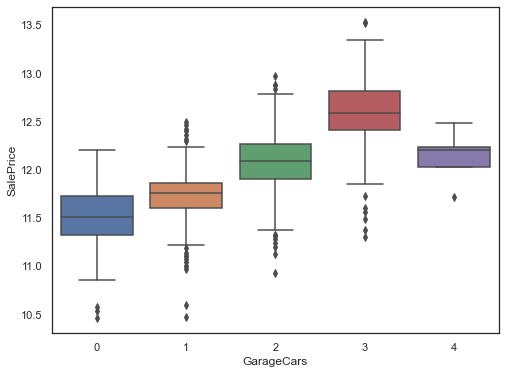

In [2810]:
#Bivariate analysis of GarageCars
plt.figure(figsize=(8,6))
sns.boxplot(x="GarageCars",y="SalePrice",data=housing)

In [2811]:
housing.GarageCars.corr(housing.SalePrice)

0.680624807436048

In [2812]:
#there is a good correlation between GarageCars and SalePrice , so will keep it as numeric
#Also for GarageCars, for value 4 there are just 5 counts , so binning it with the nearest i.e 3

less_frequent_values=[4]
housing.loc[housing.GarageCars.isin(less_frequent_values), "GarageCars"] = 3

In [2813]:
housing['GarageCars'].value_counts()

2    824
1    369
3    186
0     81
Name: GarageCars, dtype: int64

In [2814]:
#MoSold
#month sold will not be that of much significance, since we have the year. So dropping MoSold
housing.drop(columns='MoSold',axis=1,inplace=True)

In [2815]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   MSSubClass     1460 non-null   category
 1   MSZoning       1460 non-null   category
 2   LotFrontage    1460 non-null   float64 
 3   LotArea        1460 non-null   int64   
 4   Street         1460 non-null   category
 5   Alley          1460 non-null   category
 6   LotShape       1460 non-null   category
 7   LandContour    1460 non-null   category
 8   Utilities      1460 non-null   category
 9   LotConfig      1460 non-null   category
 10  LandSlope      1460 non-null   category
 11  Neighborhood   1460 non-null   category
 12  Condition1     1460 non-null   category
 13  Condition2     1460 non-null   category
 14  BldgType       1460 non-null   category
 15  HouseStyle     1460 non-null   category
 16  OverallQual    1460 non-null   int64   
 17  OverallCond    1460 non-null   in

In [2816]:
#univariate analysis of GarageYrBlt , YearBuilt and YearRemodAdd

In [2817]:
print("count of garage built in same year as house",len(housing[housing.GarageYrBlt == housing.YearBuilt]))
print("count of garage built not in same year as house",len(housing[housing.GarageYrBlt != housing.YearBuilt]))

count of garage built in same year as house 1170
count of garage built not in same year as house 290


In [2818]:
#as majority of garages are built in the same year as house, we will keep only YearBuilt and drop GarageYrBlt
housing.drop(columns='GarageYrBlt',axis=1,inplace=True)

In [2819]:
#Creating derived column property_age , which tells the age of property when sold.It will make more sense than the yearBuilt
housing['property_age'] = housing['YrSold'] - housing['YearBuilt']

In [2820]:
#Creating derived column remodeled_age , which tells the age of property when sold.It will make more sense than the yearBuilt
housing['remodeled_age'] = housing['YrSold'] - housing['YearRemodAdd']

In [2821]:
#dropping YearBuilt,YrSold and YearRemodAdd
housing.drop(columns=['YearBuilt','YrSold','YearRemodAdd'],axis=1,inplace=True)

In [2822]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   MSSubClass     1460 non-null   category
 1   MSZoning       1460 non-null   category
 2   LotFrontage    1460 non-null   float64 
 3   LotArea        1460 non-null   int64   
 4   Street         1460 non-null   category
 5   Alley          1460 non-null   category
 6   LotShape       1460 non-null   category
 7   LandContour    1460 non-null   category
 8   Utilities      1460 non-null   category
 9   LotConfig      1460 non-null   category
 10  LandSlope      1460 non-null   category
 11  Neighborhood   1460 non-null   category
 12  Condition1     1460 non-null   category
 13  Condition2     1460 non-null   category
 14  BldgType       1460 non-null   category
 15  HouseStyle     1460 non-null   category
 16  OverallQual    1460 non-null   int64   
 17  OverallCond    1460 non-null   in

<AxesSubplot:title={'center':'Correlation Matrix'}>

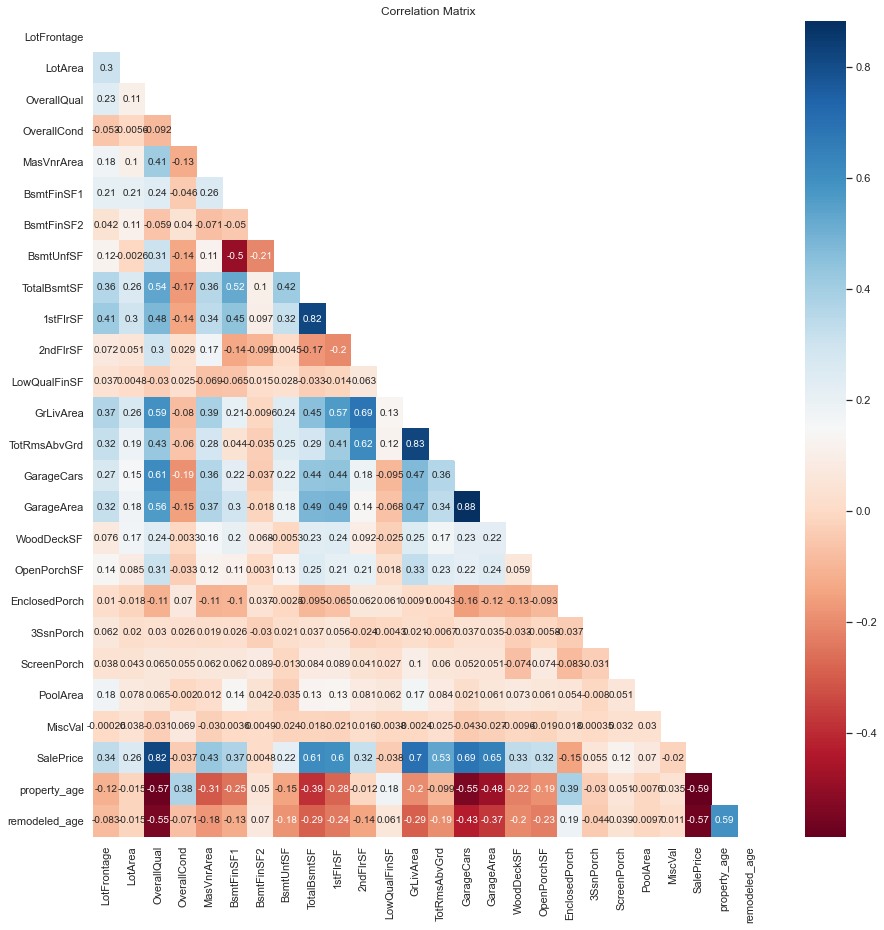

In [2823]:
#Getting the correlation matrix of target variable with the numerical predictors
corr=housing.corr()

corr_matrix = np.triu(corr)
plt.figure(figsize=(15,15))
plt.title('Correlation Matrix')
sns.heatmap(corr, mask=corr_matrix,annot=True,annot_kws={"size": 10},cmap='RdBu')

#### we can see that SalePrice has a high positive correlation with below
- OverallQual .82
- TotalBsmtSF .61
- 1stFlrSF    .61
- GrLivArea   .71
- TotRmsAbGrd .53
- GarageCars  .69
- GarageArea  .65

#### Also SalePrice has a high negative correlation with below 
- property_age  -.59
- remodeled_age -.57

In [2824]:
def highly_correlated(housing, features, threshold=0.5):
    corr_df = round(housing[features].corr(),2)
    correlated_features = np.where(np.abs(corr_df) > threshold) # select ones above the abs threshold
    correlated_features = [(corr_df.iloc[x,y], x, y) for x, y in zip(*correlated_features) if x != y and x < y]
    s_corr_list = sorted(correlated_features, key=lambda x: -abs(x[0])) # sort by correlation value
    correlation_df={}
    if s_corr_list == []:
        print("There are no highly correlated features with correlation above", threshold)
    else:
        for v, i, j in s_corr_list:
            correlation_df[corr_df.index[i] +" and "+ corr_df.columns[j]]= v
        correlation_df=pd.DataFrame(correlation_df,index=['Correlation'])
    return  correlation_df.T.sort_values(by='Correlation',ascending=False)

#### Also there are high correlation among predictor variables as well

In [2825]:
highly_correlated(housing,housing.columns)

,Correlation
GarageCars and GarageArea,0.88
GrLivArea and TotRmsAbvGrd,0.83
OverallQual and SalePrice,0.82
TotalBsmtSF and 1stFlrSF,0.82
GrLivArea and SalePrice,0.70
2ndFlrSF and GrLivArea,0.69
GarageCars and SalePrice,0.69
GarageArea and SalePrice,0.65
2ndFlrSF and TotRmsAbvGrd,0.62
OverallQual and GarageCars,0.61


In [2826]:
#GarageCars and GarageArea has a very high correlation 0.88 

<Figure size 576x432 with 0 Axes>

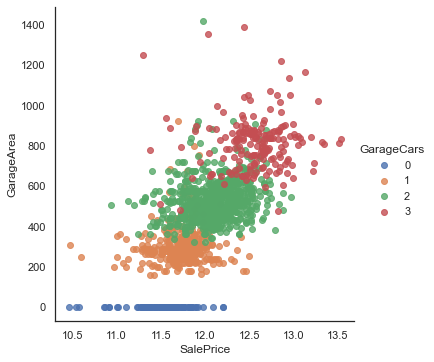

In [2827]:
#multivariate analysis between GarageCars, GarageArea and SalePrice
plt.figure(figsize=(8,6))
sns.lmplot(x='SalePrice', y='GarageArea', hue='GarageCars', 
           data=housing, 
           fit_reg=False)

In [2828]:
#we will keep both GarageArea and GarageCars, even though they are higly correlated among themselves as well as SalesPrice

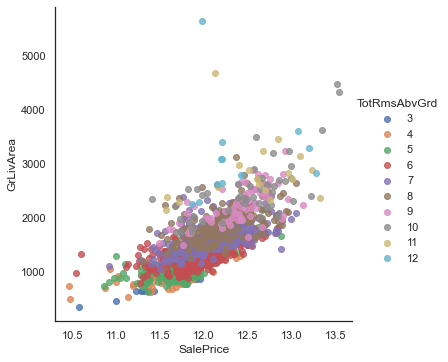

In [2829]:
#GrLivArea and TotRmsAbvGrd
sns.lmplot(x='SalePrice', y='GrLivArea', hue='TotRmsAbvGrd', 
           data=housing,logx=True,
           fit_reg=False)

<AxesSubplot:xlabel='SalePrice', ylabel='TotalBsmtSF'>

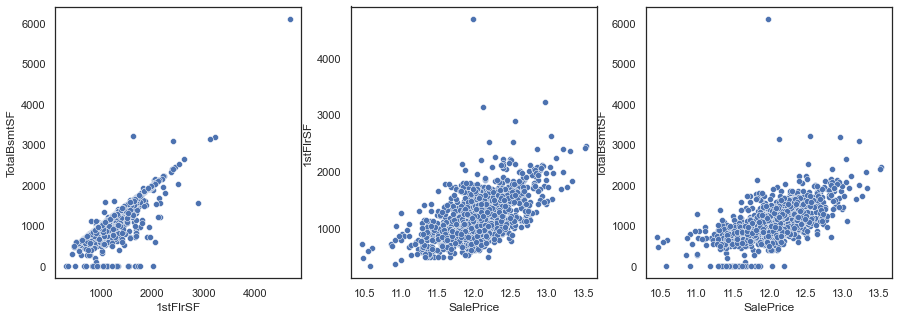

In [2830]:
#TotalBsmtSF and 1stFlrSF
plt.figure(figsize=(15,5))
sns.set(style='white')

plt.subplot(1,3,1)
sns.scatterplot(data=housing,x='1stFlrSF', y='TotalBsmtSF')

plt.subplot(1,3,2)
sns.scatterplot(data=housing,x='SalePrice', y='1stFlrSF')

plt.subplot(1,3,3)
sns.scatterplot(data=housing,x='SalePrice', y='TotalBsmtSF')


In [2831]:
#we will keep both 1stFlrSF and TotalBsmtSF, even though they are higly correlated among themselves as well as SalesPrice

<AxesSubplot:xlabel='SalePrice', ylabel='GrLivArea'>

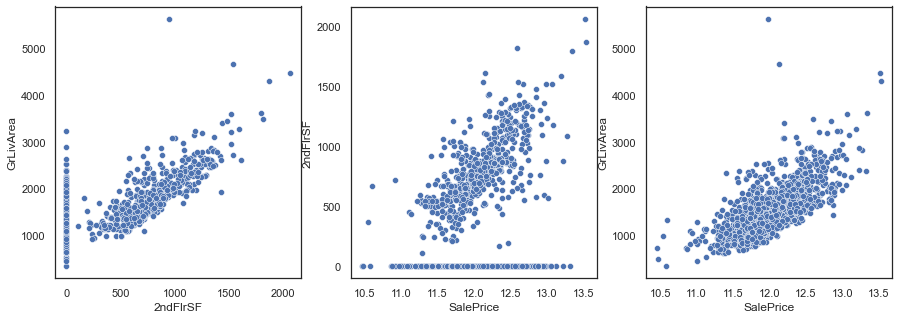

In [2832]:
#2ndFlrSF and GrLivArea
plt.figure(figsize=(15,5))
sns.set(style='white')

plt.subplot(1,3,1)
sns.scatterplot(data=housing,x='2ndFlrSF', y='GrLivArea')

plt.subplot(1,3,2)
sns.scatterplot(data=housing,x='SalePrice', y='2ndFlrSF')

plt.subplot(1,3,3)
sns.scatterplot(data=housing,x='SalePrice', y='GrLivArea')


In [2833]:
#we will keep both 2ndFlrSF and GrLivArea, even though they are higly correlated among themselves as well as SalesPrice

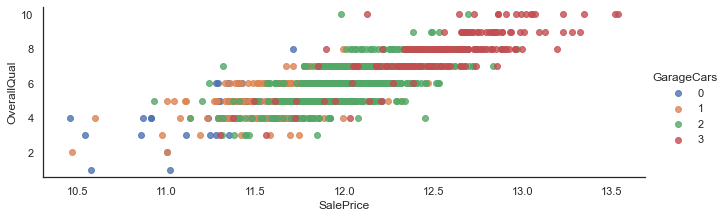

In [2834]:
# OverallQual and GarageCars
#multivariate analysis between GarageCars, OverallQual and SalePrice

sns.lmplot(x='SalePrice', y='OverallQual', hue='GarageCars', 
           data=housing,aspect=3,height=3,
           fit_reg=False)

In [2835]:
#we will keep both OverallQual and GarageCars, even though they are higly correlated among themselves as well as SalesPrice

#### Creating dummy variables for the categories using label encoding

In [2836]:
#there are some columns which have values like Ex,Gd etc.. which are categorical and can be converted into 
#ordered numerical data 

In [2837]:
tmp_cols=housing.columns[housing.isin(['Gd']).any()]
tmp_cols

Index(['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond',
       'PoolQC'],
      dtype='object')

In [2838]:
#Make a dict
label_encode = {'No':0,'None':0,'NA':0,'Mn':1,'Av':3, "Po": 1, 'Fa': 2, "TA": 3, 'Gd': 4, 'Ex': 5}
#Apply map for each column
for column in tmp_cols:
    housing[column]=housing[column].map(label_encode)
    housing[column] = housing[column].astype('int32') # converting to type int
    

In [2839]:
highly_correlated(housing,housing.columns)

,Correlation
GarageQual and GarageCond,0.96
PoolArea and PoolQC,0.94
GarageCars and GarageArea,0.88
GrLivArea and TotRmsAbvGrd,0.83
OverallQual and SalePrice,0.82
TotalBsmtSF and 1stFlrSF,0.82
OverallQual and ExterQual,0.73
ExterQual and KitchenQual,0.72
GrLivArea and SalePrice,0.70
GarageCars and SalePrice,0.69


In [2840]:
housing.select_dtypes(include=np.number).columns.to_flat_index()

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'KitchenQual',
       'TotRmsAbvGrd', 'FireplaceQu', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'PoolQC', 'MiscVal', 'SalePrice',
       'property_age', 'remodeled_age'],
      dtype='object')

In [2841]:
#above is the list of all the numeric types features. We will see if we can derive new Predictors out of them
#function to draw the distribution plot
def distplot_skewness(feature):
    sns.displot(feature,kde=True,height=3,aspect=2)
    plt.show()
    print("skewness ",feature.skew())

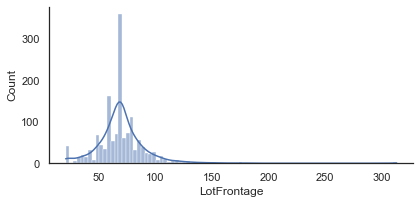

skewness  2.4091466665496006


In [2842]:
#LotFrontage
distplot_skewness(housing.LotFrontage)

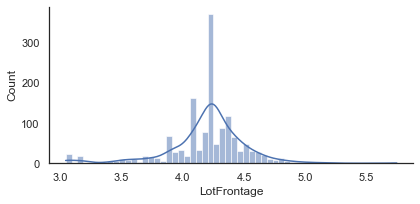

skewness  -0.9091148013817885


In [2843]:
# the data is skewed to the right , so will apply log transformation on it to check if its normally distributed or not
housing.LotFrontage = np.log(housing.LotFrontage)
distplot_skewness(housing.LotFrontage)

In [2844]:
# its slightly skewed to the left  , but its more closer to a normal distribution.So we will keep the log transformation for LotFrontage

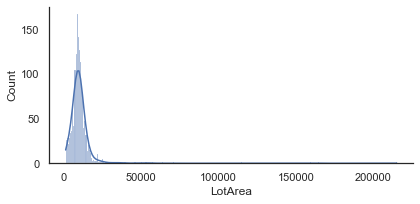

skewness  12.207687851233496


In [2845]:
#LotArea
distplot_skewness(housing.LotArea)

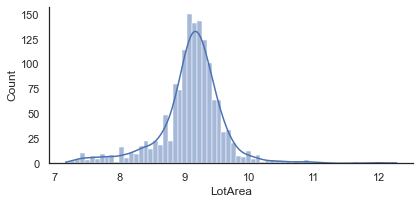

skewness  -0.1379938086958118


In [2846]:
# the data is highly skewed to the right so we will see if log transformation helps
#housing.LotArea = np.log(housing.LotArea)
distplot_skewness(np.log(housing.LotArea))

In [2847]:
# its slightly skewed to the left  , but its more closer to a normal distribution.So we will keep the log transformation for LotArea
housing.LotArea = np.log(housing.LotArea)

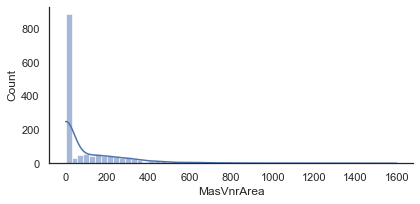

skewness  2.6776164510820997


In [2848]:
#MasVnrArea
distplot_skewness(housing.MasVnrArea)

In [2849]:
len(housing[housing.MasVnrArea==0])/len(housing.index)*100

59.52054794520548

In [2850]:
# Around 60% data in MasVnrArea has value equal to 0,suggesting no masonry so dropping MasVnrArea and MasVnrType , 
#since both will have very less effect on the target variable
housing.drop(columns=['MasVnrArea','MasVnrType'],axis=1,inplace=True)

In [2851]:
housing.shape,housing_original.shape

((1460, 75), (1460, 81))

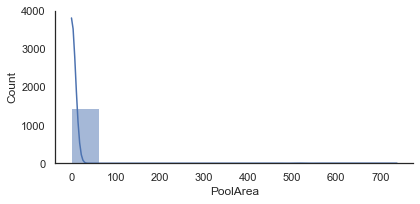

skewness  14.828373640750588


In [2852]:
#PoolArea
distplot_skewness(housing.PoolArea)

In [2853]:
len(housing[housing.PoolArea==0])/len(housing.index)*100

99.52054794520548

In [2854]:
#we can see that more than 99% of data is having value as 0, so dropping PoolArea and PoolQC.
#since both will have very little effect on the target
housing.drop(columns=['PoolArea','PoolQC'],axis=1,inplace=True)

In [2855]:
#OverallCond and OverallQual are explaining the same thing. So we will create a new feature out of the two
housing['OverallQualCond'] = (housing['OverallCond'] * housing['OverallQual'])

In [2856]:
#dropping the original features
housing.drop(columns=['OverallCond','OverallQual'],axis=1,inplace=True)

In [2857]:
#ExterQual,ExterCond are explaining the same thing. So we will create a new feature out of the two
housing['ExterQualCond'] = (housing['ExterQual'] * housing['ExterCond'])

In [2858]:
#dropping the original features
housing.drop(columns=['ExterQual','ExterCond'],axis=1,inplace=True)

In [2859]:
housing.shape,housing_original.shape

((1460, 71), (1460, 81))

In [2860]:
#BsmtQual,BsmtCond
#ExterQual,ExterCond are explaining the same thing. So we will create a new feature out of the two
housing['BsmtQualCond'] = (housing['BsmtQual'] * housing['BsmtCond'])

In [2861]:
#dropping the original features
housing.drop(columns=['BsmtQual','BsmtCond'],axis=1,inplace=True)

In [2862]:
#GarageQual,GarageCond
#ExterQual,ExterCond are explaining the same thing. So we will create a new feature out of the two
housing['GarageQualCond'] = (housing['GarageQual'] * housing['GarageCond'])

In [2863]:
#dropping the original features
housing.drop(columns=['GarageQual','GarageCond'],axis=1,inplace=True)

In [2864]:
housing.shape,housing_original.shape

((1460, 69), (1460, 81))

In [2865]:
#BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF' - we will create a new feature out of these three
housing['TotalBsmtSF'] = (housing['BsmtFinSF1'] + housing['BsmtFinSF2']+ housing['TotalBsmtSF'])

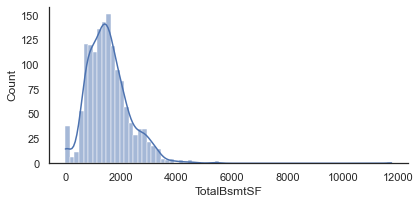

skewness  2.0796749818722


In [2866]:
distplot_skewness((housing.TotalBsmtSF))

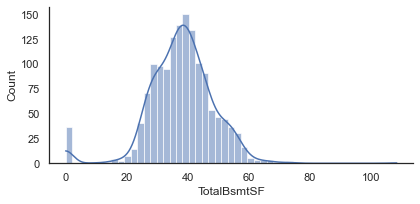

skewness  -0.5338970671632542


In [2867]:
#this new feature is skewed to the right, so we wil apply sqrt transformation and check for the distribution
distplot_skewness(np.sqrt(housing.TotalBsmtSF))

In [2868]:
#its still slightly skewed to the left, but it is more closer to a normal distribution
#so we wil apply sqrt transformation on this feature
housing.TotalBsmtSF = np.sqrt(housing.TotalBsmtSF)

In [2869]:
#dropping the original columns BsmtFinSF1,BsmtFinSF2
housing.drop(columns=['BsmtFinSF1','BsmtFinSF2'],axis=1,inplace=True)

In [2870]:
#1stFlrSF,2ndFlrSF- creating new feature out of this
housing['TotalFlrSF'] = housing['1stFlrSF'] + housing['2ndFlrSF']

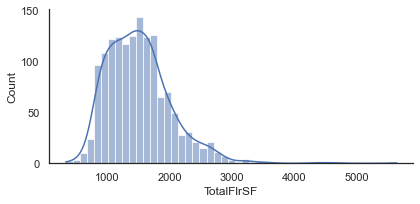

skewness  1.3304699646546214


In [2871]:
distplot_skewness((housing['TotalFlrSF']))

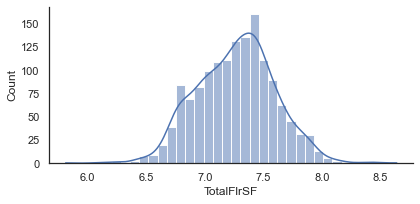

skewness  -0.03454500170967152


In [2872]:
#the new feature is skewed to the right, so we will apply log transformation on it and check
distplot_skewness(np.log(housing['TotalFlrSF']))

In [2873]:
#its still slightly skewed, but is closer to a normal distribution.So we will apply log transformation on it
housing['TotalFlrSF'] = np.log(housing['TotalFlrSF'])

In [2874]:
#dropping the original feature
housing.drop(columns=['1stFlrSF','2ndFlrSF'],axis=1,inplace=True)

In [2875]:
#'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch','ScreenPorch' - creating a new feature out of all these
housing['TotalPorchSF'] = housing['WoodDeckSF']+housing['OpenPorchSF']+housing['EnclosedPorch']+housing['3SsnPorch']+housing['ScreenPorch']

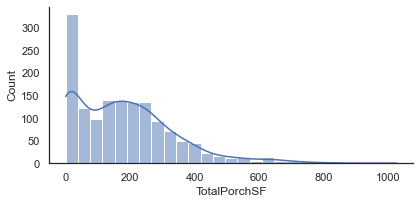

skewness  1.102313211663996


In [2876]:
distplot_skewness((housing['TotalPorchSF']))

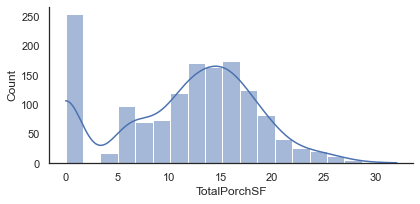

skewness  -0.27356155909320123


In [2877]:
#the new feature is skewed to the right, so we will do sqrt transformation and will check
distplot_skewness(np.sqrt(housing['TotalPorchSF']))

In [2878]:
#its still slightly skewed to the left, but is more closer to normal distribution.So we will transform the new feature
housing['TotalPorchSF']= np.sqrt(housing['TotalPorchSF'])

In [2879]:
#dropping the original features 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch','ScreenPorch'
housing.drop(columns=['WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch'],axis=1,inplace=True)

In [2880]:
housing.shape,housing_original.shape

((1460, 62), (1460, 81))

#### creating dummy variables for categorical variables using one hot encoding

In [2881]:
housing_categorical = housing.select_dtypes(include=['category'])

In [2882]:
# convert into dummies and drop the first one
housing_dummies = pd.get_dummies(housing_categorical, drop_first=True)
housing_dummies.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_NA,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NA,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NA,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,BsmtFullBath_1,BsmtFullBath_2,BsmtFullBath_3,BsmtHalfBath_1,BsmtHalfBath_2,FullBath_1,FullBath_2,FullBath_3,HalfBath_1,HalfBath_2,BedroomAbvGr_3,BedroomAbvGr_1_and_less,BedroomAbvGr_4_and_more,KitchenAbvGr_1,KitchenAbvGr_2,KitchenAbvGr_3,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,Fireplaces_1,Fireplaces_2_and_more,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_NA,MiscFeature_NA,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [2883]:
#drop the original category columns
housing = housing.drop(list(housing_categorical.columns), axis=1)

In [2884]:
# concat dummy variables with Original dataframe
housing = pd.concat([housing, housing_dummies], axis=1)

In [2885]:
print("final shape-->",housing.shape)
print("original shape-->",housing_original.shape)

final shape--> (1460, 231)
original shape--> (1460, 81)


### Dividing into X(containing only the predictors) and y(containing the target) sets for the model building

In [2886]:
y = housing.pop('SalePrice')
X = housing

#### Test-Train split

In [2887]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

#### Feature Scaling

In [2888]:
scaler = StandardScaler()

X_numerical = X.select_dtypes(include=['float64','int32','int64'])

In [2889]:
X_numerical.columns

Index(['LotFrontage', 'LotArea', 'BsmtExposure', 'BsmtUnfSF', 'TotalBsmtSF',
       'HeatingQC', 'LowQualFinSF', 'GrLivArea', 'KitchenQual', 'TotRmsAbvGrd',
       'FireplaceQu', 'GarageCars', 'GarageArea', 'MiscVal', 'property_age',
       'remodeled_age', 'OverallQualCond', 'ExterQualCond', 'BsmtQualCond',
       'GarageQualCond', 'TotalFlrSF', 'TotalPorchSF'],
      dtype='object')

In [2890]:
#scaling only the numeric columns and not the dummy variables
X_train[X_numerical.columns] = scaler.fit_transform(X_train[X_numerical.columns])

In [2891]:
X_train.head()

,LotFrontage,LotArea,BsmtExposure,BsmtUnfSF,TotalBsmtSF,HeatingQC,LowQualFinSF,GrLivArea,KitchenQual,TotRmsAbvGrd,FireplaceQu,GarageCars,GarageArea,MiscVal,property_age,remodeled_age,OverallQualCond,ExterQualCond,BsmtQualCond,GarageQualCond,TotalFlrSF,TotalPorchSF,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_NA,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NA,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NA,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,BsmtFullBath_1,BsmtFullBath_2,BsmtFullBath_3,BsmtHalfBath_1,BsmtHalfBath_2,FullBath_1,FullBath_2,FullBath_3,HalfBath_1,HalfBath_2,BedroomAbvGr_3,BedroomAbvGr_1_and_less,BedroomAbvGr_4_and_more,KitchenAbvGr_1,KitchenAbvGr_2,KitchenAbvGr_3,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,Fireplaces_1,Fireplaces_2_and_more,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_NA,MiscFeature_NA,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
210,0.037108,-0.912571,-0.640332,-0.374367,-0.124989,-1.179071,-0.124502,-1.228053,-0.776063,-0.939084,-0.983487,-2.396900,-2.217786,-0.084263,1.529604,1.704092,-0.422494,-0.718733,-0.505485,-3.564361,-1.514790,-0.240339,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,

### Model Building and Evaluation

#### Linear Regression

In [2892]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [2894]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

-3019980591141.478
[ 9.83929011e-03  5.07062039e-02  1.96294867e-02  3.81897709e-03
  6.99566347e-02  7.12305328e-03 -3.05390640e-03  1.04854661e-01
  9.14734644e-03  7.67238974e-03  3.00702047e-02  2.28679907e-02
  1.39096343e-02 -2.17583789e-02 -7.02328250e-02 -2.24069664e-02
  5.51171239e-02 -4.97886479e-04  5.87823742e-03  2.72142171e-02
  3.30925069e-02  1.34136390e-02 -2.05054237e-02 -1.05228894e-01
 -1.90525825e-01  2.09892315e-02 -8.16514886e-02  2.15986910e-02
 -1.84793991e-01 -6.25548336e-02 -9.71134368e-02  2.23683618e+12
  4.54682543e-02 -4.35656201e-02  5.54089940e-02 -2.70592932e+12
  4.66177404e-01  3.65486100e-01  4.06040489e-01  3.84675255e-01
  1.31679125e-01  1.38478261e-02  4.21476344e-02  1.14226653e-02
 -3.70663874e-02  1.61049741e-02 -1.79477400e-02  5.35371282e-03
  9.27995265e-03 -7.65137040e-03  3.51804141e-02 -2.45081060e-02
 -1.99455212e-02  5.49589822e-03  3.56398646e-02 -7.04290789e-04
 -8.90384185e-02 -1.31466303e-03  1.42102219e-02 -4.70369525e-02
 -2.86

In [2895]:
#applying the same transformation on test as well before predicting

X_test[X_numerical.columns] = scaler.transform(X_test[X_numerical.columns])

In [2897]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("r2_score Train-->",r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("r2_score Test-->",r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("RSS Train-->",rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS Test-->",rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("MSE Train-->",mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("MSE Test-->",mse_test_lr)
metric.append(mse_test_lr**0.5)

r2_score Train--> 0.9491963338860306
r2_score Test--> -2.8595174239159814e+23
RSS Train--> 8.153594291660674
RSS Test--> 2.0608133460351473e+25
MSE Train--> 0.007985890589285675
MSE Test--> 4.705053301450108e+22


### Ridge Regression

In [2898]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 
#https://scikit-learn.org/stable/modules/model_evaluation.html

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [2899]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 20}


In [2985]:
#Fitting Ridge model for alpha = 20 and printing coefficients which have been penalised
alpha = 20
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 2.81146124e-03  4.07163162e-02  1.74346443e-02 -3.57472277e-04
  3.90600311e-02  9.50466701e-03  1.05506615e-02 -2.81688065e-02
  1.53323047e-02  1.21903566e-02  3.17682305e-02  3.77419359e-02
  2.31342055e-03 -6.42699056e-04 -5.51767036e-02 -2.01575411e-02
  7.20776245e-02 -1.34674817e-04  1.56923295e-02  8.66727389e-03
  1.48925595e-01  1.00081413e-02 -3.21626017e-02 -3.39437235e-03
  9.07794483e-03  8.57459461e-04 -2.37708502e-02  2.16289388e-02
  2.22563942e-03 -7.27168361e-03 -2.62585493e-03 -3.04320583e-03
 -5.02749825e-03 -2.44405206e-02  5.82074511e-05 -1.12471726e-02
  3.58348911e-02  2.28390206e-02  3.71049582e-02  2.87007855e-03
  1.69191810e-02  3.02842015e-03  2.41297728e-02  8.32487501e-03
 -3.08799229e-02  5.96809357e-03  3.05124788e-02  1.03106378e-02
  2.70301591e-02 -6.28581881e-03  2.56330807e-02 -2.74104923e-02
 -3.97979324e-03  8.78363470e-04  1.39154405e-02  4.05382655e-03
 -1.39161701e-04 -1.18437887e-04  3.05363012e-02  2.31144325e-02
 -1.45053500e-02  5.61865

In [2986]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train_ridge = ridge.predict(X_train)
y_pred_test_ridge = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train_ridge)
print("r2_score Train-->",r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test_ridge)
print("r2_score Test-->",r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train_ridge))
print("RSS Train-->",rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test_ridge))
print("RSS Test-->",rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train_ridge)
print("MSE Train-->",mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test_ridge)
print("MSE Test-->",mse_test_lr)
metric2.append(mse_test_lr**0.5)

r2_score Train--> 0.9258451472238558
r2_score Test--> 0.8968882883978114
RSS Train--> 11.901278599424817
RSS Test--> 7.431113712582883
MSE Train--> 0.011656492261924405
MSE Test--> 0.016966013042426675


### Lasso Regression

In [2987]:

lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 


Fitting 5 folds for each of 29 candidates, totalling 145 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.05, 0.1, 0.2,
                                   0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0,
                                   3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20,
                                   50, 100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [2988]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


In [2989]:
#Fitting Lasso model for alpha = 0.0001 and printing coefficients which have been penalised

alpha = 0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0001)

In [2990]:
lasso.coef_

array([ 2.72192812e-03,  4.50398329e-02,  1.88023297e-02, -1.55200401e-03,
        5.42231620e-02,  8.72982482e-03,  1.27878903e-02, -4.84706080e-02,
        9.70811662e-03,  9.72888256e-03,  2.50422359e-02,  3.57319145e-02,
        3.28303422e-03, -7.46451099e-04, -5.84751120e-02, -2.11691517e-02,
        6.44692182e-02, -1.17407619e-03,  1.29774517e-02,  1.66636146e-02,
        1.78974637e-01,  8.43738719e-03, -2.95355945e-02, -4.24966173e-03,
       -0.00000000e+00, -6.19740245e-03, -3.95108719e-02,  0.00000000e+00,
       -4.98772960e-03, -5.64577474e-04, -2.07905103e-02, -1.60611733e-02,
       -1.19111871e-02, -7.21911983e-02,  0.00000000e+00, -5.99790143e-02,
        3.03383813e-01,  3.14639094e-01,  3.07940450e-01,  2.82049929e-01,
        3.73618572e-02,  1.78632381e-02,  5.37478472e-02, -0.00000000e+00,
       -7.50554730e-02,  1.15264720e-02,  4.22688318e-02,  1.12372363e-02,
        3.33208253e-02, -1.12746190e-02,  2.94323339e-02, -4.53624939e-02,
       -5.34292425e-03,  

In [2991]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train_lasso = lasso.predict(X_train)
y_pred_test_lasso = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train_lasso)
print("R2_score Train-->",r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test_lasso)
print("R2_score Test-->",r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train_lasso))
print("RSS Train-->",rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test_lasso))
print("RSS Test-->",rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train_lasso)
print("MSE Train-->",mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test_lasso)
print("MSE Test-->",mse_test_lr)
metric3.append(mse_test_lr**0.5)

R2_score Train--> 0.947998862419984
R2_score Test--> 0.8913209262346833
RSS Train--> 8.345779172336051
RSS Test--> 7.832345548137617
MSE Train--> 0.008174122597782616
MSE Test--> 0.017882067461501408


In [2992]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),9.491963e-01,0.925845,0.947999
1,R2 Score (Test),-2.859517e+23,0.896888,0.891321
2,RSS (Train),8.153594e+00,11.901279,8.345779
3,RSS (Test),2.060813e+25,7.431114,7.832346
4,MSE (Train),8.936381e-02,0.107965,0.090411
5,MSE (Test),2.169113e+11,0.130254,0.133724


#### Lets observe the changes in the coefficients after regularization

In [2993]:
betas = pd.DataFrame(index=X.columns)
betas.rows = X.columns
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [2994]:
betas.head(200)

,Linear,Ridge,Lasso
LotFrontage,9.839290e-03,0.002811,0.002722
LotArea,5.070620e-02,0.040716,0.045040
BsmtExposure,1.962949e-02,0.017435,0.018802
BsmtUnfSF,3.818977e-03,-0.000357,-0.001552
TotalBsmtSF,6.995663e-02,0.039060,0.054223
HeatingQC,7.123053e-03,0.009505,0.008730
LowQualFinSF,-3.053906e-03,0.010551,0.012788
GrLivArea,1.048547e-01,-0.028169,-0.048471
KitchenQual,9.147346e-03,0.015332,0.009708
TotRmsAbvGrd,7.672390e-03,0.012190,0.009729


In [3015]:
(betas['Ridge'].sort_values(ascending=False,key=abs)).head(10)


TotalFlrSF              0.148926
OverallQualCond         0.072078
Neighborhood_Edwards   -0.070747
Neighborhood_NridgHt    0.057734
Neighborhood_Crawfor    0.056187
Neighborhood_NoRidge    0.055947
property_age           -0.055177
Condition1_Norm         0.053939
Neighborhood_IDOTRR    -0.051567
Neighborhood_Somerst    0.048649
Name: Ridge, dtype: float64

In [3016]:
betas['Lasso'].sort_values(ascending=False,key=abs).head(10)

Condition2_PosN    -0.974675
RoofMatl_WdShngl    0.540148
RoofMatl_CompShg    0.408965
RoofMatl_Roll       0.343904
RoofMatl_Tar&Grv    0.341101
RoofMatl_WdShake    0.324586
MSZoning_RH         0.314639
MSZoning_RL         0.307940
MSZoning_FV         0.303384
RoofMatl_Membran    0.285249
Name: Lasso, dtype: float64

In [2997]:
betas.sort_values(by='Ridge',ascending=False,key=abs).head(10)

,Linear,Ridge,Lasso
TotalFlrSF,0.033093,0.148926,0.178975
OverallQualCond,0.055117,0.072078,0.064469
Neighborhood_Edwards,-0.075445,-0.070747,-0.074218
Neighborhood_NridgHt,0.064179,0.057734,0.094622
Neighborhood_Crawfor,0.078968,0.056187,0.097912
Neighborhood_NoRidge,0.080321,0.055947,0.106407
property_age,-0.070233,-0.055177,-0.058475
Condition1_Norm,0.071365,0.053939,0.068583
Neighborhood_IDOTRR,-0.052834,-0.051567,-0.029266
Neighborhood_Somerst,0.000635,0.048649,0.078535


In [2998]:
betas.sort_values(by='Lasso',ascending=False,key=abs).head(10)

,Linear,Ridge,Lasso
Condition2_PosN,-1.363123,-0.043170,-0.974675
RoofMatl_WdShngl,2.072972,0.032494,0.540148
RoofMatl_CompShg,1.965843,0.017405,0.408965
RoofMatl_Roll,2.002892,0.001868,0.343904
RoofMatl_Tar&Grv,1.873091,-0.001962,0.341101
RoofMatl_WdShake,1.866455,0.000846,0.324586
MSZoning_RH,0.365486,0.022839,0.314639
MSZoning_RL,0.406040,0.037105,0.307940
MSZoning_FV,0.466177,0.035835,0.303384
RoofMatl_Membran,2.007135,0.001611,0.285249


In [3013]:
betas.Lasso[betas.Lasso == 0.0000].count()

57

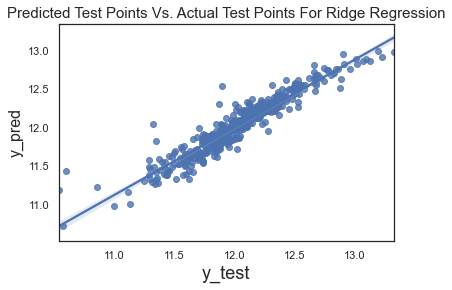

In [3002]:
corr_plot = sns.regplot(x=y_test, y=y_pred_test_ridge)
plt.title('Predicted Test Points Vs. Actual Test Points For Ridge Regression', fontdict={'fontsize': 15})             # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)  
plt.show()

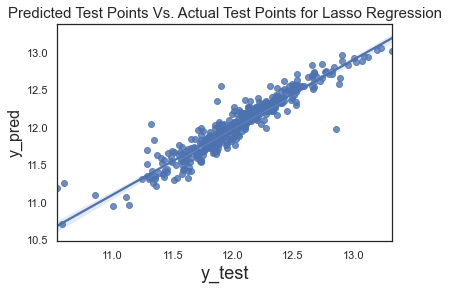

In [3003]:
corr_plot = sns.regplot(x=y_test, y=y_pred_test_lasso)
plt.title('Predicted Test Points Vs. Actual Test Points for Lasso Regression', fontdict={'fontsize': 15})             # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)  
plt.show()

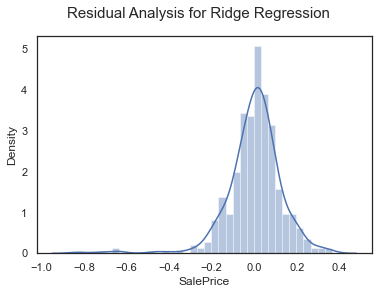

In [3004]:
residual_ridge = y_test - y_pred_test_ridge

fig = plt.figure()
sns.distplot(residual_ridge)
fig.suptitle('Residual Analysis for Ridge Regression', fontsize = 15) 
plt.tight_layout
plt.show()

Text(0, 0.5, 'Error')

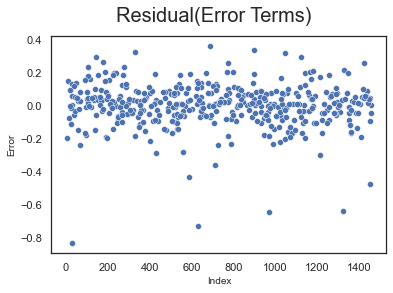

In [3005]:
sns.scatterplot(data = y_test - y_pred_test_ridge)
plt.suptitle('Residual(Error Terms)', fontsize = 20)                  # Plot heading 
plt.xlabel('Index', fontsize = 10)
plt.ylabel('Error', fontsize = 10)

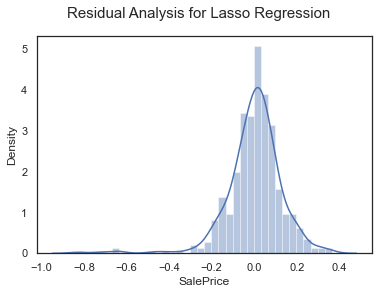

In [3006]:
residual_lasso = y_test - y_pred_test_lasso

fig = plt.figure()
sns.distplot(residual_ridge)
fig.suptitle('Residual Analysis for Lasso Regression', fontsize = 15) 
plt.tight_layout
plt.show()

Text(0, 0.5, 'Error')

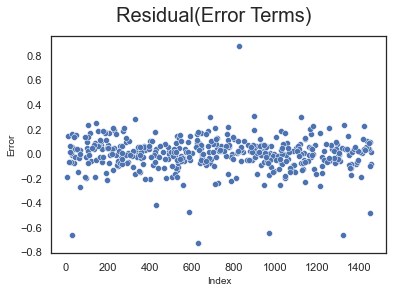

In [3007]:
sns.scatterplot(data = y_test - y_pred_test_lasso)
plt.suptitle('Residual(Error Terms)', fontsize = 20)                  # Plot heading 
plt.xlabel('Index', fontsize = 10)
plt.ylabel('Error', fontsize = 10)